Importing Dependencies

In [68]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

import cv2
import matplotlib.pyplot as plt
import numpy as np

In [69]:
#Selecting runtime
if torch.cuda.is_available():
  device = 'cuda' 
else:
  device = 'cpu' 
print(device)

cuda


Defining transformer to convert our data to pytorch format and normalizing our data

In [70]:
#Transforms data and normalizes values between -1 and 1.
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5),(0.5))])

Fetching data

In [71]:
#Downloading training data
trainset = torchvision.datasets.MNIST('mnist',
                                      train = True,
                                      download = True,
                                      transform = transform)

#Downloading testing data
testset = torchvision.datasets.MNIST('mnist',
                                    train = False,
                                    download = True,
                                    transform = transform)

In [72]:
#Function for plotting data
def imgshow(image = None, size = 5):
  w, h = image.shape[0], image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize = (size*aspect_ratio, size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.axis(False)
  plt.show()

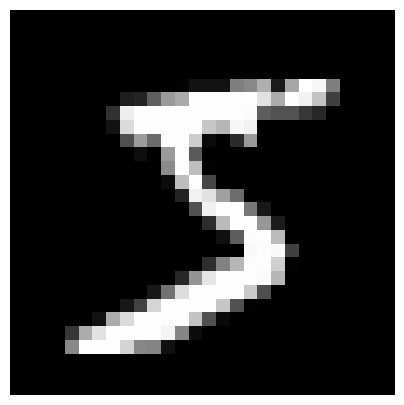

In [73]:
image = trainset.data[0].numpy()
imgshow(image)

In [74]:
trainset.data.shape

torch.Size([60000, 28, 28])

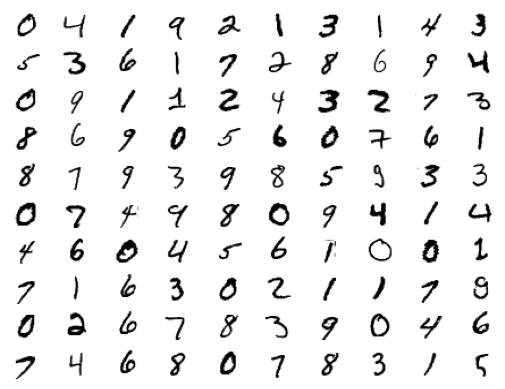

In [75]:
#Plotting starting 100 images
number_of_images = 100
plt.figure()

for index in range(1, number_of_images + 1):
  plt.subplot(10, 10, index)
  plt.axis(False)
  plt.imshow(trainset.data[index], cmap = 'gray_r')

Creating Data Loader

In [76]:
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size = 128,
                                          shuffle = True,
                                          num_workers = 0)

testloader = torch.utils.data.DataLoader(testset,
                                         batch_size = 128,
                                         shuffle = False,
                                         num_workers = 0)

In [77]:
#Iterator for dataloader
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([128, 1, 28, 28])
torch.Size([128])


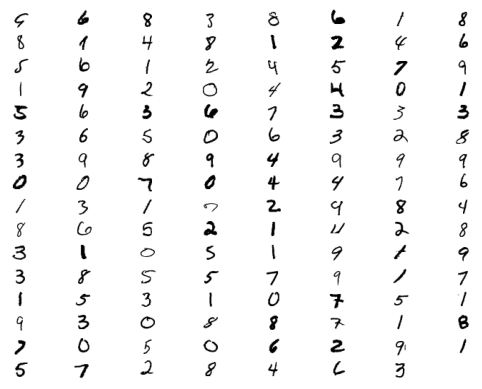

In [78]:
number_of_images = 128
plt.figure()

for index in range(1, number_of_images):
  plt.subplot(16, 8, index)
  plt.axis(False)
  plt.imshow(images[index][0].numpy(), cmap = 'gray_r')

Building Model

In [79]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 32, 3)
    self.conv2 = nn.Conv2d(32, 64, 3)
    self.pool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(64*12*12, 128)
    self.fc2 = nn.Linear(128, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 64*12*12)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

net = Net()
net.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

Defining Loss function and optimizer

In [80]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.002, momentum = 0.8)

Training our model

In [81]:
epochs = 10

epoch_log = []
loss_log = []
accuracy_log = []

for epoch in range(epochs):  
    print('Starting Epoch: ',epoch+1)

    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs) 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step() 

        running_loss += loss.item()
        if i % 50 == 49:    
            correct = 0 
            total = 0 


            with torch.no_grad():
                
                for data in testloader:
                    images, labels = data
          
                    images = images.to(device)
                    labels = labels.to(device)

                    outputs = net(images)

                    _, predicted = torch.max(outputs.data, dim = 1)

                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

                accuracy = 100 * correct / total
                epoch_num = epoch + 1
                actual_loss = running_loss / 50
                print(f'Epoch: {epoch_num}, Mini-Batches Completed: {(i+1)}, Loss: {actual_loss:.3f}, Test Accuracy = {accuracy:.3f}%')
                running_loss = 0.0

    epoch_log.append(epoch_num)
    loss_log.append(actual_loss)
    accuracy_log.append(accuracy)

print('Finished Training')

Starting Epoch:  1
Epoch: 1, Mini-Batches Completed: 50, Loss: 2.250, Test Accuracy = 52.910%
Epoch: 1, Mini-Batches Completed: 100, Loss: 2.023, Test Accuracy = 66.210%
Epoch: 1, Mini-Batches Completed: 150, Loss: 1.377, Test Accuracy = 81.100%
Epoch: 1, Mini-Batches Completed: 200, Loss: 0.757, Test Accuracy = 85.260%
Epoch: 1, Mini-Batches Completed: 250, Loss: 0.519, Test Accuracy = 87.780%
Epoch: 1, Mini-Batches Completed: 300, Loss: 0.435, Test Accuracy = 88.760%
Epoch: 1, Mini-Batches Completed: 350, Loss: 0.393, Test Accuracy = 89.750%
Epoch: 1, Mini-Batches Completed: 400, Loss: 0.373, Test Accuracy = 90.270%
Epoch: 1, Mini-Batches Completed: 450, Loss: 0.348, Test Accuracy = 90.930%
Starting Epoch:  2
Epoch: 2, Mini-Batches Completed: 50, Loss: 0.326, Test Accuracy = 91.240%
Epoch: 2, Mini-Batches Completed: 100, Loss: 0.315, Test Accuracy = 91.690%
Epoch: 2, Mini-Batches Completed: 150, Loss: 0.294, Test Accuracy = 92.150%
Epoch: 2, Mini-Batches Completed: 200, Loss: 0.291, 